<a href="https://colab.research.google.com/github/Betinsss/CSST101-3A/blob/main/3A-LAT-HEALTH-MP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Machine Problem: Bayesian Network for Healthcare Diagnosis**

##**Exercise 1: Setting Up the Environment**

**1. Install Libraries:**

In [1]:
!pip install pgmpy networkx matplotlib pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.9 MB/s eta 0:00:00


**2. Import Libraries:**

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination


##**Exercise 2: Define the Bayesian Network Structure**

**1. Define the Variables:**

In [3]:
model = BayesianNetwork([
    ('Age', 'Heart Disease'),
    ('Smoking', 'Heart Disease'),
    ('Exercise', 'Heart Disease'),
    ('Cholesterol', 'Heart Disease'),
    ('Blood Pressure', 'Heart Disease'),
    ('Heart Disease', 'Chest Pain'),
    ('Heart Disease', 'ECG Result')
])

print(model.edges())

[('Age', 'Heart Disease'), ('Heart Disease', 'Chest Pain'), ('Heart Disease', 'ECG Result'), ('Smoking', 'Heart Disease'), ('Exercise', 'Heart Disease'), ('Cholesterol', 'Heart Disease'), ('Blood Pressure', 'Heart Disease')]


**2. Define the Relationships:**

**Variables:** These include Age, Smoking, Exercise, Cholesterol, BloodPressure, HeartDisease, ChestPain, and ECGResult.

**Dependencies:**

**HeartDisease** is influenced by Age, Smoking, Exercise, Cholesterol, and BloodPressure.

**ChestPain** is directly dependent on HeartDisease.

**ECGResult** is also directly dependent on HeartDisease. This code defines the structure of the Bayesian Network, representing

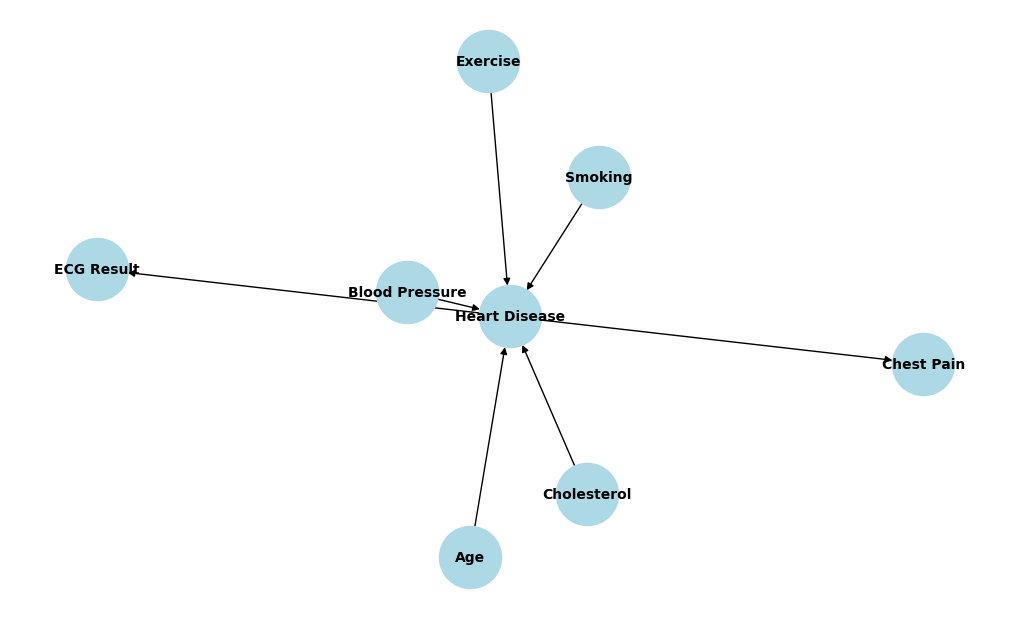

In [4]:
nx_graph = nx.DiGraph()

# Add edges to the networkx graph from the BayesianNetwork model
nx_graph.add_edges_from(model.edges())

# Visualize the Bayesian Network structure
plt.figure(figsize=(10, 6))
nx.draw(nx_graph, with_labels=True, node_color='lightblue', node_size=2000, font_size=10, font_weight='bold', arrows=True)
plt.show()

##**Exercise 3: Define Conditional Probability Tables (CPTs)**

**1. Create CPTs Using pgmpy:**


In [5]:


# CPT for Heart Disease
cpd_heart_disease = TabularCPD(
    variable='Heart Disease',
    variable_card=2,
    values=[[0.9] * 48,  # P(No Heart Disease)
            [0.1] * 48], # P(Heart Disease)
    evidence=['Age', 'Smoking', 'Exercise', 'Cholesterol', 'Blood Pressure'],
    evidence_card=[3, 2, 2, 2, 2]
)

# CPT for Chest Pain
cpd_chest_pain = TabularCPD(
    variable='Chest Pain',
    variable_card=2,
    values=[[0.7, 0.1],  # P(No Chest Pain | No Heart Disease), P(No Chest Pain | Heart Disease)
            [0.3, 0.9]], # P(Chest Pain | No Heart Disease), P(Chest Pain | Heart Disease)
    evidence=['Heart Disease'],
    evidence_card=[2]
)

# CPT for ECG Result
cpd_ecg_result = TabularCPD(
    variable='ECG Result',
    variable_card=2,
    values=[[0.8, 0.2],  # P(Normal ECG | No Heart Disease), P(Normal ECG | Heart Disease)
            [0.2, 0.8]], # P(Abnormal ECG | No Heart Disease), P(Abnormal ECG | Heart Disease)
    evidence=['Heart Disease'],
    evidence_card=[2]
)

# Adding all CPTs to the model
model.add_cpds(cpd_heart_disease, cpd_chest_pain, cpd_ecg_result)


##**Exercise 4: Inference in the Bayesian Network**

**1. Perform Probabilistic Inference:**

In [6]:
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

# Define CPDs for parent nodes
cpd_age = TabularCPD(variable='Age', variable_card=3, values=[[0.3], [0.5], [0.2]])
cpd_smoking = TabularCPD(variable='Smoking', variable_card=2, values=[[0.6], [0.4]])
cpd_exercise = TabularCPD(variable='Exercise', variable_card=2, values=[[0.7], [0.3]])
cpd_cholesterol = TabularCPD(variable='Cholesterol', variable_card=2, values=[[0.4], [0.6]])
cpd_blood_pressure = TabularCPD(variable='Blood Pressure', variable_card=2, values=[[0.5], [0.5]])

# Adding these CPDs to the model
model.add_cpds(cpd_age, cpd_smoking, cpd_exercise, cpd_cholesterol, cpd_blood_pressure)

# Ensure the model is valid
model.check_model()

# Initialize the inference object
inference = VariableElimination(model)

# Probability of Heart Disease given specific evidence
query_result = inference.query(variables=['Heart Disease'],
                               evidence={'Age': 1, 'Smoking': 1, 'Cholesterol': 1, 'Blood Pressure': 1})
print("Probability of Heart Disease given Middle-aged, Smoker, High Cholesterol, High Blood Pressure:")
print(query_result)

# Probability of Abnormal ECG Result given Chest Pain
query_result_ecg = inference.query(variables=['ECG Result'], evidence={'Chest Pain': 1})
print("\nProbability of Abnormal ECG Result given Chest Pain:")
print(query_result_ecg)


Probability of Heart Disease given Middle-aged, Smoker, High Cholesterol, High Blood Pressure:
+------------------+----------------------+
| Heart Disease    |   phi(Heart Disease) |
+==================+======================+
| Heart Disease(0) |               0.9000 |
+------------------+----------------------+
| Heart Disease(1) |               0.1000 |
+------------------+----------------------+

Probability of Abnormal ECG Result given Chest Pain:
+---------------+-------------------+
| ECG Result    |   phi(ECG Result) |
+===============+===================+
| ECG Result(0) |            0.6500 |
+---------------+-------------------+
| ECG Result(1) |            0.3500 |
+---------------+-------------------+


**2. Posterior Probability Analysis:**

In [7]:
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

# Define CPDs for parent nodes
cpd_age = TabularCPD(variable='Age', variable_card=3, values=[[0.3], [0.5], [0.2]])
cpd_smoking = TabularCPD(variable='Smoking', variable_card=2, values=[[0.6], [0.4]])
cpd_exercise = TabularCPD(variable='Exercise', variable_card=2, values=[[0.7], [0.3]])
cpd_cholesterol = TabularCPD(variable='Cholesterol', variable_card=2, values=[[0.4], [0.6]])
cpd_blood_pressure = TabularCPD(variable='Blood Pressure', variable_card=2, values=[[0.5], [0.5]])

# Adding these CPDs to the model
model.add_cpds(cpd_age, cpd_smoking, cpd_exercise, cpd_cholesterol, cpd_blood_pressure)

# Ensure the model is valid
model.check_model()

# Initialize the inference object
inference = VariableElimination(model)

# Posterior probability distribution of Heart Disease in patients who do not exercise
query_result_no_exercise = inference.query(variables=['Heart Disease'], evidence={'Exercise': 1})
print("\nProbability distribution of Heart Disease in patients who do not exercise:")
print(query_result_no_exercise)


Probability distribution of Heart Disease in patients who do not exercise:
+------------------+----------------------+
| Heart Disease    |   phi(Heart Disease) |
+==================+======================+
| Heart Disease(0) |               0.9000 |
+------------------+----------------------+
| Heart Disease(1) |               0.1000 |
+------------------+----------------------+


##**Exercise 5: Parameter Learning from Simulated Data**

**1. Simulate a Healthcare Dataset:**


In [8]:

# Set random seed for reproducibility
np.random.seed(42)

# Define the number of samples
n_samples = 1000

# Generate random values for the variables based on assumed probabilities

# Age (0: Young, 1: Middle-aged, 2: Old)
age = np.random.choice([0, 1, 2], size=n_samples, p=[0.3, 0.5, 0.2])

# Smoking (0: No, 1: Yes)
smoking = np.random.choice([0, 1], size=n_samples, p=[0.6, 0.4])

# Exercise (0: Regular, 1: None)
exercise = np.random.choice([0, 1], size=n_samples, p=[0.7, 0.3])

# Cholesterol (0: Normal, 1: High)
cholesterol = np.random.choice([0, 1], size=n_samples, p=[0.6, 0.4])

# Blood Pressure (0: Normal, 1: High)
blood_pressure = np.random.choice([0, 1], size=n_samples, p=[0.5, 0.5])

# Heart Disease depends on Age, Smoking, Exercise, Cholesterol, and Blood Pressure
heart_disease = []
for i in range(n_samples):
    if age[i] == 2 or smoking[i] == 1 or cholesterol[i] == 1 or blood_pressure[i] == 1:
        heart_disease.append(np.random.choice([0, 1], p=[0.3, 0.7]))  # High risk group
    else:
        heart_disease.append(np.random.choice([0, 1], p=[0.7, 0.3]))  # Low risk group

# Chest Pain depends on Heart Disease
chest_pain = [np.random.choice([0, 1], p=[0.2, 0.8]) if hd == 1 else np.random.choice([0, 1], p=[0.8, 0.2]) for hd in heart_disease]

# ECG Result depends on Heart Disease
ecg_result = [np.random.choice([0, 1], p=[0.1, 0.9]) if hd == 0 else np.random.choice([0, 1], p=[0.9, 0.1]) for hd in heart_disease]

# Create the dataframe
data = pd.DataFrame({
    'Age': age,
    'Smoking': smoking,
    'Exercise': exercise,
    'Cholesterol': cholesterol,
    'Blood Pressure': blood_pressure,
    'Heart Disease': heart_disease,
    'Chest Pain': chest_pain,
    'ECG Result': ecg_result
})

# Display the first few rows of the dataset
data.head()


,Age,Smoking,Exercise,Cholesterol,Blood Pressure,Heart Disease,Chest Pain,ECG Result
0,1,0,0,1,1,1,1,0
1,2,0,0,1,1,1,0,0
2,1,1,1,0,1,1,1,0
3,1,1,0,1,0,1,1,0
4,0,1,0,0,0,1,0,0


**2. Estimate Parameters:**


In [9]:
from pgmpy.estimators import MaximumLikelihoodEstimator

# Create a new Bayesian Network model with the same structure
model_learned = BayesianNetwork([('Age', 'Heart Disease'),
                                 ('Smoking', 'Heart Disease'),
                                 ('Exercise', 'Heart Disease'),
                                 ('Cholesterol', 'Heart Disease'),
                                 ('Blood Pressure', 'Heart Disease'),
                                 ('Heart Disease', 'Chest Pain'),
                                 ('Heart Disease', 'ECG Result')])

# Fit the model using Maximum Likelihood Estimation
model_learned.fit(data, estimator=MaximumLikelihoodEstimator)

# Print the learned CPDs for Heart Disease, Chest Pain, and ECG Result
for cpd in model_learned.get_cpds():
    print(f"\nCPD for {cpd.variable}:\n", cpd)



CPD for Age:
 +--------+-------+
| Age(0) | 0.319 |
+--------+-------+
| Age(1) | 0.482 |
+--------+-------+
| Age(2) | 0.199 |
+--------+-------+

CPD for Heart Disease:
 +------------------+---------------------+-----+-------------------+-------------------+
| Age              | Age(0)              | ... | Age(2)            | Age(2)            |
+------------------+---------------------+-----+-------------------+-------------------+
| Blood Pressure   | Blood Pressure(0)   | ... | Blood Pressure(1) | Blood Pressure(1) |
+------------------+---------------------+-----+-------------------+-------------------+
| Cholesterol      | Cholesterol(0)      | ... | Cholesterol(1)    | Cholesterol(1)    |
+------------------+---------------------+-----+-------------------+-------------------+
| Exercise         | Exercise(0)         | ... | Exercise(1)       | Exercise(1)       |
+------------------+---------------------+-----+-------------------+-------------------+
| Smoking          | Smoki

In [10]:
# Compare learned CPTs with initial CPTs
print("\nOriginal CPD for Heart Disease:\n", cpd_heart_disease)
print("\nLearned CPD for Heart Disease:\n", model_learned.get_cpds('Heart Disease'))

print("\nOriginal CPD for Chest Pain:\n", cpd_chest_pain)
print("\nLearned CPD for Chest Pain:\n", model_learned.get_cpds('Chest Pain'))

print("\nOriginal CPD for ECG Result:\n", cpd_ecg_result)
print("\nLearned CPD for ECG Result:\n", model_learned.get_cpds('ECG Result'))



Original CPD for Heart Disease:
 +------------------+-------------------+-----+-------------------+-------------------+
| Age              | Age(0)            | ... | Age(2)            | Age(2)            |
+------------------+-------------------+-----+-------------------+-------------------+
| Smoking          | Smoking(0)        | ... | Smoking(1)        | Smoking(1)        |
+------------------+-------------------+-----+-------------------+-------------------+
| Exercise         | Exercise(0)       | ... | Exercise(1)       | Exercise(1)       |
+------------------+-------------------+-----+-------------------+-------------------+
| Cholesterol      | Cholesterol(0)    | ... | Cholesterol(1)    | Cholesterol(1)    |
+------------------+-------------------+-----+-------------------+-------------------+
| Blood Pressure   | Blood Pressure(0) | ... | Blood Pressure(0) | Blood Pressure(1) |
+------------------+-------------------+-----+-------------------+-------------------+
| Heart D

**Exercise 6: Network Visualization and Analysis**

In [11]:
# Check the CPDs of the model
for cpd in model.get_cpds():
    print(cpd)


+------------------+-------------------+-----+-------------------+-------------------+
| Age              | Age(0)            | ... | Age(2)            | Age(2)            |
+------------------+-------------------+-----+-------------------+-------------------+
| Smoking          | Smoking(0)        | ... | Smoking(1)        | Smoking(1)        |
+------------------+-------------------+-----+-------------------+-------------------+
| Exercise         | Exercise(0)       | ... | Exercise(1)       | Exercise(1)       |
+------------------+-------------------+-----+-------------------+-------------------+
| Cholesterol      | Cholesterol(0)    | ... | Cholesterol(1)    | Cholesterol(1)    |
+------------------+-------------------+-----+-------------------+-------------------+
| Blood Pressure   | Blood Pressure(0) | ... | Blood Pressure(0) | Blood Pressure(1) |
+------------------+-------------------+-----+-------------------+-------------------+
| Heart Disease(0) | 0.9               | ..

**1. Visualize the Network:**

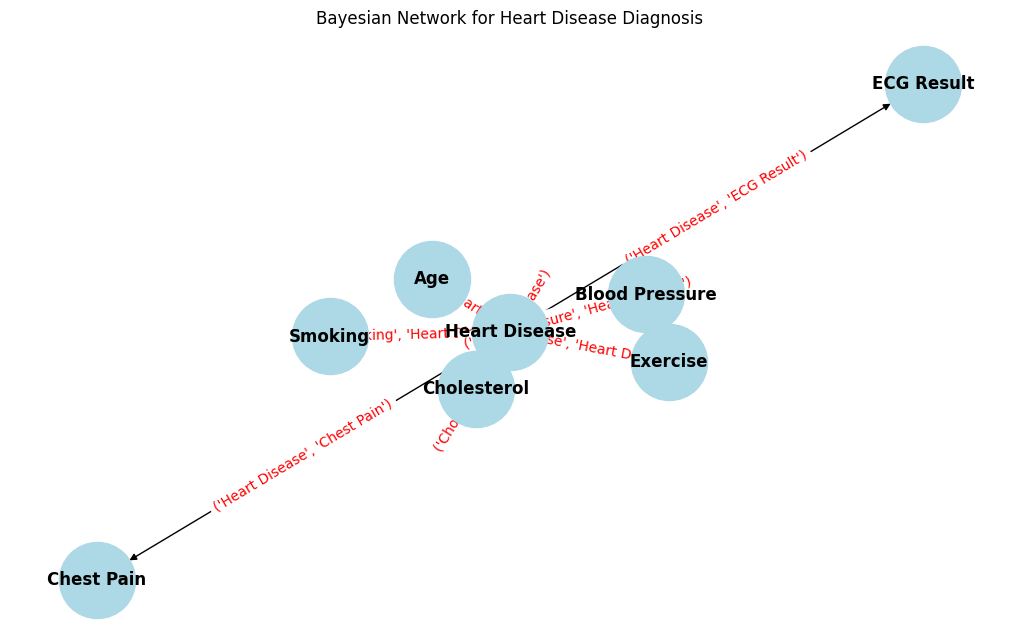

In [12]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
nx_graph = nx.DiGraph()

# Manually add edges based on the defined relationships in the Bayesian Network
edges = [
    ('Age', 'Heart Disease'),
    ('Smoking', 'Heart Disease'),
    ('Exercise', 'Heart Disease'),
    ('Cholesterol', 'Heart Disease'),
    ('Blood Pressure', 'Heart Disease'),
    ('Heart Disease', 'Chest Pain'),
    ('Heart Disease', 'ECG Result')
]

# Add edges to the directed graph
nx_graph.add_edges_from(edges)

# Visualize the Bayesian Network structure
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(nx_graph)  # Position nodes using Fruchterman-Reingold force-directed algorithm

# Draw the graph
nx.draw(nx_graph, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=12, font_weight='bold', arrows=True)

# Add title and labels for edges
plt.title("Bayesian Network for Heart Disease Diagnosis")

# Optionally, add edge labels for clarity
edge_labels = {edge: edge for edge in edges}  # Create edge labels
nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels=edge_labels, font_color='red')

plt.show()


**2. Sensitivity Analysis:**

In [13]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import numpy as np

# Define the Bayesian Network structure
model = BayesianNetwork([
    ('Age', 'Heart Disease'),
    ('Smoking', 'Heart Disease'),
    ('Exercise', 'Heart Disease'),
    ('Cholesterol', 'Heart Disease'),
    ('Blood Pressure', 'Heart Disease'),
    ('Heart Disease', 'Chest Pain'),
    ('Heart Disease', 'ECG Result')
])

# Define the CPDs with state names and values
cpd_age = TabularCPD(variable='Age', variable_card=3,
                     values=[[0.33], [0.33], [0.34]],  # Probabilities for Young, Middle-aged, Old
                     state_names={'Age': ['Young', 'Middle-aged', 'Old']})

cpd_smoking = TabularCPD(variable='Smoking', variable_card=2,
                         values=[[0.3], [0.7]],  # Probabilities for Yes, No
                         state_names={'Smoking': ['Yes', 'No']})

cpd_exercise = TabularCPD(variable='Exercise', variable_card=2,
                          values=[[0.5], [0.5]],  # Probabilities for Regular, None
                          state_names={'Exercise': ['Regular', 'None']})

cpd_cholesterol = TabularCPD(variable='Cholesterol', variable_card=2,
                             values=[[0.4], [0.6]],  # Probabilities for High, Normal
                             state_names={'Cholesterol': ['High', 'Normal']})

cpd_blood_pressure = TabularCPD(variable='Blood Pressure', variable_card=2,
                                values=[[0.4], [0.6]],  # Probabilities for High, Normal
                                state_names={'Blood Pressure': ['High', 'Normal']})

# Heart Disease probabilities (dependent on Age, Smoking, Exercise, Cholesterol, Blood Pressure)
# Initialize a 2x48 array for Heart Disease CPD
heart_disease_values = np.zeros((2, 48))

# Populate the heart_disease_values with probabilities
# The order is based on the combinations of the parent states
index = 0
for age in range(3):  # 3 states for Age
    for smoking in range(2):  # 2 states for Smoking
        for exercise in range(2):  # 2 states for Exercise
            for cholesterol in range(2):  # 2 states for Cholesterol
                for blood_pressure in range(2):  # 2 states for Blood Pressure
                    # Assign probabilities for Heart Disease and No Heart Disease
                    heart_disease_values[0][index] = np.random.uniform(0.0, 0.3)  # P(No Heart Disease)
                    heart_disease_values[1][index] = 1 - heart_disease_values[0][index]  # P(Heart Disease)
                    index += 1

# Define CPD for Heart Disease
cpd_heart_disease = TabularCPD(variable='Heart Disease', variable_card=2,
                               values=heart_disease_values,
                               evidence=['Age', 'Smoking', 'Exercise', 'Cholesterol', 'Blood Pressure'],
                               evidence_card=[3, 2, 2, 2, 2],
                               state_names={
                                   'Heart Disease': ['No', 'Yes'],
                                   'Age': ['Young', 'Middle-aged', 'Old'],
                                   'Smoking': ['Yes', 'No'],
                                   'Exercise': ['Regular', 'None'],
                                   'Cholesterol': ['High', 'Normal'],
                                   'Blood Pressure': ['High', 'Normal']
                               })

cpd_chest_pain = TabularCPD(variable='Chest Pain', variable_card=2,
                            values=[[0.7, 0.2],  # P(No Chest Pain | No Heart Disease)
                                    [0.3, 0.8]],  # P(Chest Pain | Heart Disease)
                            evidence=['Heart Disease'],
                            evidence_card=[2],
                            state_names={'Chest Pain': ['No', 'Yes'], 'Heart Disease': ['No', 'Yes']})

cpd_ecg_result = TabularCPD(variable='ECG Result', variable_card=2,
                            values=[[0.8, 0.3],  # P(Normal | No Heart Disease)
                                    [0.2, 0.7]],  # P(Abnormal | Heart Disease)
                            evidence=['Heart Disease'],
                            evidence_card=[2],
                            state_names={'ECG Result': ['Normal', 'Abnormal'], 'Heart Disease': ['No', 'Yes']})

# Add CPDs to the model
model.add_cpds(cpd_age, cpd_smoking, cpd_exercise, cpd_cholesterol,
               cpd_blood_pressure, cpd_heart_disease, cpd_chest_pain, cpd_ecg_result)

# Verify the model
assert model.check_model()

# Initialize the inference object
from pgmpy.inference import VariableElimination
inference = VariableElimination(model)

# Query the probability of Heart Disease given that the patient is Middle-aged and has High Cholesterol and High Blood Pressure
query_result = inference.query(variables=['Heart Disease'],
                               evidence={'Age': 'Middle-aged',
                                         'Cholesterol': 'High',
                                         'Blood Pressure': 'High'})

print(query_result)


+--------------------+----------------------+
| Heart Disease      |   phi(Heart Disease) |
+====================+======================+
| Heart Disease(No)  |               0.1735 |
+--------------------+----------------------+
| Heart Disease(Yes) |               0.8265 |
+--------------------+----------------------+


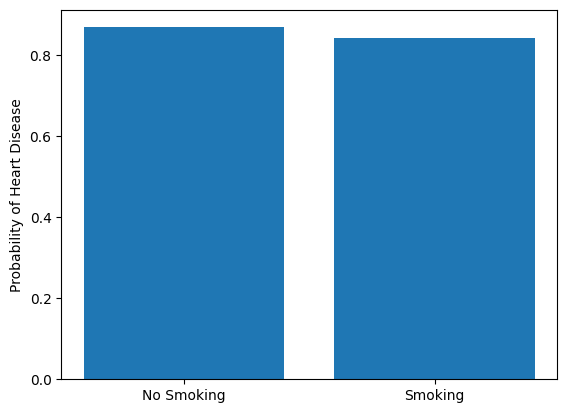

In [17]:
smoking_values = ['No', 'Yes']  # Change to state names
probabilities = []

for smoking in smoking_values:
    prob_heart_disease = inference.query(variables=['Heart Disease'], evidence={'Smoking': smoking})
    probabilities.append(prob_heart_disease)

plt.bar(['No Smoking', 'Smoking'], [prob.values[1] for prob in probabilities])
plt.ylabel('Probability of Heart Disease')
plt.show()